# Cian O Brien - R00101689

##### The purpose of this assignment is to build a model which will accurately classify an email as a ham or spam mail. 
##### I will begin by importing the data into one dataframe,
##### The next step will be familiarizing myself with the data. Finding the size of the dataframe, generating plots etc,
#### After familiarizing myself with the data I will clean the data; remove punctuations & Stopwords,
#### I would like to find the top 20 most common words, and possibly remove then to eleminate bias,
#### Finally once all the preprocessing is done I will balance both classes within the dataset and I will implement feature engeneering and build 2 models; Multinomial Naive Bayes and a SVM Model.

In [1]:
#Import libraries
import numpy as np 
import pandas as pd 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import glob
import matplotlib.pyplot as plt

In [2]:
!pip install wordcloud

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
from wordcloud import WordCloud

### Reading in the ham data and creating a dataframe.

In [10]:
# Reading Spam emails and creating dataframe ham (non-spam = 0) #
path_ham = r'C:/Users/obria/Desktop/Year2/ML/Assignment1/ham/*.txt' 
ham_files = glob.glob(path_ham)
list_ham = []
for file_path in ham_files:
    with open(file_path) as f:
        list_ham.append(f.read())


In [11]:
# Create a dataframe for ham, also create a new column called target and assign ham the value of 0 ##
df_ham = pd.DataFrame(list_ham, columns=["emails"])
df_ham["target"]=0

### Display the length of the Ham dataframe - We can compare this to the spam dataframe below, 
### if the two are very different we may need to balance the dataframes to avoid bias during prediction

In [12]:
## get the length of ham #
len(df_ham)

3672

### Display the top 5 rows of Ham, just to get an idea of the data we will be working with.

In [13]:
df_ham.head()  

,emails,target
0,Subject: christmas tree farm pictures\n,0
1,"Subject: vastar resources , inc .\ngary , prod...",0
2,Subject: calpine daily gas nomination\n- calpi...,0
3,Subject: re : issue\nfyi - see note below - al...,0
4,Subject: meter 7268 nov allocation\nfyi .\n- -...,0


In [14]:
#Print the shape (Get the number of rows and cols)
df_ham.shape

(3672, 2)

### Remove Duplicates and print length of ham dataframe once duplicates are removed

In [15]:
#Checking for duplicates and removing them
df_ham.drop_duplicates(inplace = True)

In [16]:
# Show the new shape (number of rows & columns)
df_ham.shape

(3531, 2)

### Check for null values.

In [17]:
#Show the number of missing (NAN, NaN, na) data for each column
df_ham.isnull().sum()


emails    0
target    0
dtype: int64

### Read in Spam Data and create a dataframe.

In [18]:
# Reading Spam emails and creating dataframe spam (spam = 1) #
path_spam = r'C:/Users/obria/Desktop/Year2/ML/Assignment1/spam/*.txt' 
spam_files = glob.glob(path_spam)
list_spam = []
for file_path in spam_files:
    with open(file_path, encoding="Latin-1") as f:
        list_spam.append(f.read())

In [19]:
# Create a dataframe for ham, also create a new column called target and assign ham the value of 0 ##
df_spam = pd.DataFrame(list_spam, columns=["emails"])
df_spam["target"]=1

### We can see below that the length of Spam is 1500 whereas Ham is 3531, the two dataframes are highly imbalanced.
### We will need to balance them before we run the model.

In [20]:
len(df_spam)

1500

In [21]:
df_spam.head() 

,emails,target
0,Subject: dobmeos with hgh my energy level has ...,1
1,Subject: your prescription is ready . . oxwq s...,1
2,Subject: get that new car 8434\npeople nowthe ...,1
3,"Subject: await your response\ndear partner ,\n...",1
4,"Subject: coca cola , mbna america , nascar par...",1


In [22]:
df_spam.shape

(1500, 2)

In [23]:
df_spam.isnull().sum()

emails    0
target    0
dtype: int64

### Remove duplicates.

### Print length of Spam once duplicates have been removed.

In [24]:
#Checking for duplicates and removing them
df_spam.drop_duplicates(inplace = True)

In [25]:
df_spam.shape

(1463, 2)

### Create one big dataframe, joining Ham and Spam.

### The target column will tell us which are Spam emails and which are ham

### Ham - 0
### Spam - 1

In [30]:
# Create one Dataframe for all Ham & Spam #

df_list = [df_spam,df_ham]
# df_list
df_master = pd.concat(df_list, sort=True)
df_master.head()

,emails,target
0,Subject: dobmeos with hgh my energy level has ...,1
1,Subject: your prescription is ready . . oxwq s...,1
2,Subject: get that new car 8434\npeople nowthe ...,1
3,"Subject: await your response\ndear partner ,\n...",1
4,"Subject: coca cola , mbna america , nascar par...",1


In [31]:
df_master.shape

(4994, 2)

### The below are word clouds of both Ham and spam emails.

### Although they aren't incredibly informative they do give us an idea of what the most common words are.
### We can see in Ham emails words such as "etc, enron, subject, hou" are common words,
### We can see in Spam emails words such as "Now, New, subject, Company" are common words.

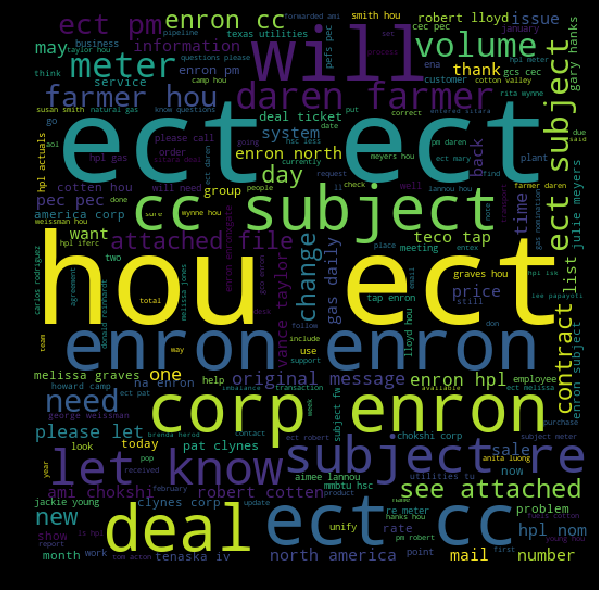

In [28]:
## Ham Word Cloud ## 

ham_words = ''.join(list(df_ham[df_ham['target']==0]['emails']))
ham_wc = WordCloud(width=512,height=512).generate(ham_words)
plt.figure(figsize = (10,8), facecolor = 'k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

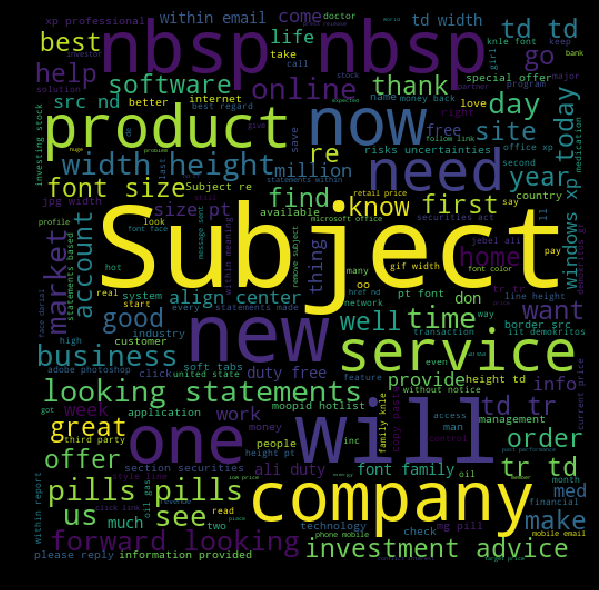

In [29]:
## Spam Word Cloud ## 

spam_words = ''.join(list(df_spam[df_spam['target']==1]['emails']))
spam_wc = WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize = (10,8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [32]:

#Need to download stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\obria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Clean the Data.

#### Remove punctuations and stopwords.

#### Print the top 5 rows of the dataframe to see if words were removed.


In [33]:
#Tokenization (a list of tokens), will be used as the analyzer
#1.Punctuations are [!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]
#2.Stop words in natural language processing, are useless words (data).
def process_text(emails):
    '''
    What will be covered:
    1. Remove punctuation
    2. Remove stopwords
    3. Return list of clean text words
    '''
    
    #1
    nopunc = [char for char in emails if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #2
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    #3
    return clean_words


In [34]:
#Show the Tokenization (a list of tokens )
df_master['emails'].head().apply(process_text)


0    [Subject, dobmeos, hgh, energy, level, gone, s...
1    [Subject, prescription, ready, oxwq, f, e, low...
2    [Subject, get, new, car, 8434, people, nowthe,...
3    [Subject, await, response, dear, partner, team...
4    [Subject, coca, cola, mbna, america, nascar, p...
Name: emails, dtype: object

### Now we will print the top 20 most frequent words.

#### We will count each word within the dataframe wihout it being cleaned and then will will do the same once the 
#### dataframe has been cleaned.

In [35]:
from collections import Counter
import pandas as pd

          Frequency
Word               
-             83924
.             53986
/             42267
,             40120
:             24655
ect           13693
@             12584
'              7491
hou            7182
enron          6442
)              5942
(              5631
>              5592
subject:       4994
=              4908
;              4707
?              4608
2000           4287
com            3703
!              3599


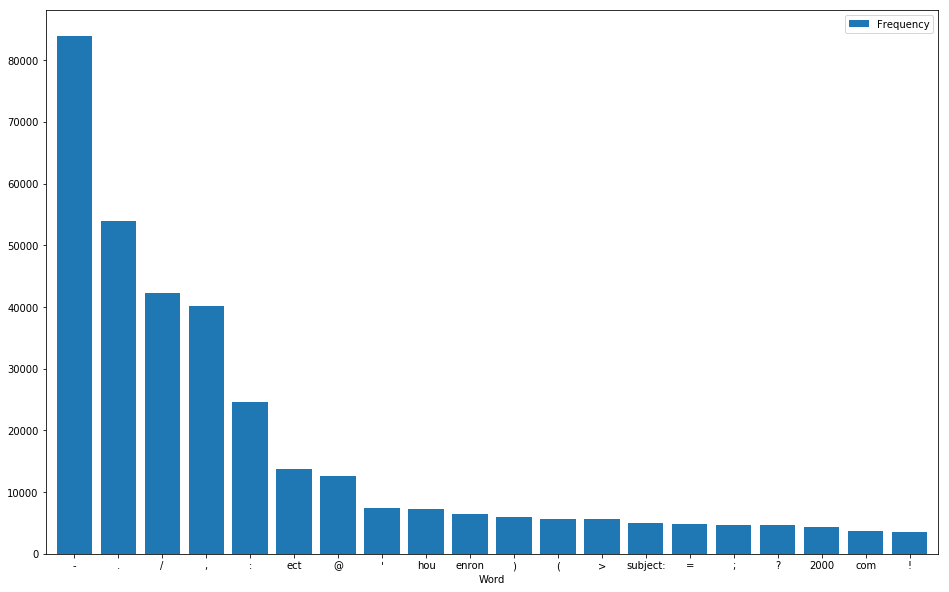

In [36]:
top_N = 20


stopwords = nltk.corpus.stopwords.words('english')
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (df_master['emails']
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)

#### We can see from the above plot how important it is to remove punctuations, by including them we cannot get an accurate representation of the words within the emails.

### Function to clean the string

In [37]:
import re

def clean_string(the_string):
    the_clean_string = re.sub(r"[@\/\"$%#\[\]{}\^?&\.:!-_\d\{\}]", "", the_string)

    return the_clean_string

In [38]:
df_master['emails'] = df_master['emails'].apply(clean_string) 

### Create a new column in the dataframe which will contain the email length,
### We can utilize this new column when plotting the below histogram to get an accurate visualisation of the data.

#### Print the top 5 rows of the dataframe

In [39]:
import string

# Function to calculate the length of an email including the space # 
df_master["email_len"] = df_master["emails"].apply(lambda x: len(x) - x.count(" "))

df_master.head()

,emails,target,email_len
0,ubject dobmeos with hgh my energy level has go...,1,818
1,ubject your prescription is ready oxwq s f e...,1,361
2,ubject get that new car \npeople nowthe weathe...,1,135
3,ubject await your response\ndear partner \nwe ...,1,2535
4,ubject coca cola mbna america nascar partner...,1,3052


### Plot a Histogram for the data.

#####  We can see that there are more ham emails, which we would of expected as there are more Ham than Spam mails.

C:\Users\obria\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\obria\Anaconda3\lib\site-packages\matplotlib\legend.py:640: UserWarning: Unrecognized location "Upper left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


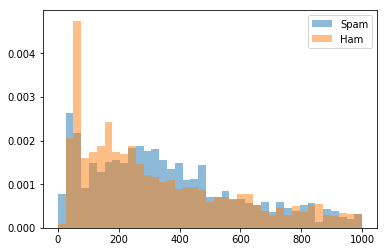

In [40]:
bins = np.linspace(0, 1000, 40)

plt.hist(df_master[df_master["target"]==1]["email_len"], bins, alpha=0.5, normed=True, label="Spam")
plt.hist(df_master[df_master["target"]==0]["email_len"], bins, alpha=0.5, normed=True, label="Ham")
plt.legend(loc="Upper left")
plt.show()

#### We can clearly see that Ham has a high number of words as compared to Spam. So it’s a good feature to distinguish

## Plot boxplot

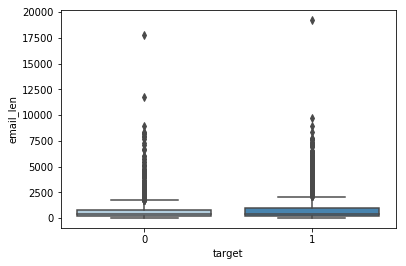

In [42]:
# library & dataset
import seaborn as sns
 
# Use a color palette
sns.boxplot( x=df_master["target"], y=df_master["email_len"], palette="Blues")


#### From the boxplot we can see that the length of Spam and Ham emails are relatively similar however it does appear the spam emails are of a longer length, we can also see by looking at the outliers that the longest email was in a Spam email. 

#### The code below also confirms our thoughts, the longest email belongs to the Spam class.


In [43]:
## From the boxplot we can see that the length of Sam and Ham emails
## are relatively similar however it does appear the spam emails are of a longer 
## lengeth, we can also see by looking at the outliers that the longest email 
## was in a Spam email.

df_master[df_master['email_len']==df_master['email_len'].max()]

,emails,target,email_len
167,ubject online pharxmacy off all meds\ndissco...,1,19207


### Plotted the frequency of words again with stop words and punctuations removed.

         Frequency
Word              
ect          13693
hou           7182
enron         6442
ubject        4994
com           3703
please        3135
gas           2923
subject       2835
deal          2773
meter         2451
cc            2317
pm            2301
hpl           2291
e             1958
thanks        1843
daren         1837
corp          1728
know          1537
need          1451
new           1422


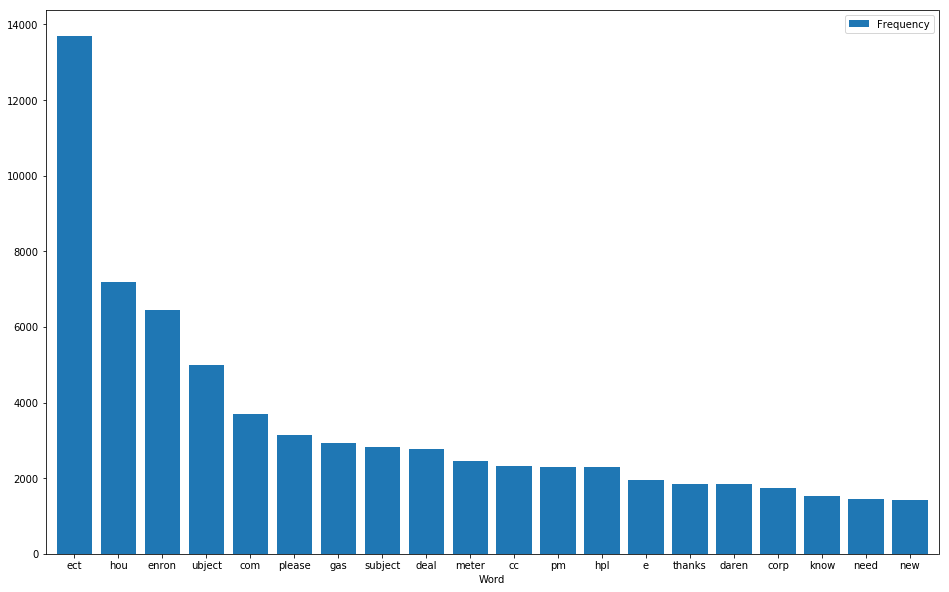

In [44]:
top_N = 20


stopwords = nltk.corpus.stopwords.words('english')
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (df_master['emails']
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)


# plot
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)


### Remove the top 20 frequent words from the dataframe. The reason this was done was to eliminate any bias that frequent words may cause.

#### Print the word frequency again to see a new list of top 20 frequent words

In [45]:
## Remove top 20 common words ##

##Create dataframe with words I want to remove ##

# generate DF out of Counter
df_removeWords = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency'])


df_master.emails = df_master.emails.replace('|'.join(df_removeWords['Word']), '', regex=True).str.strip()

          Frequency
Word               
th            26069
b              5773
w              4671
hav            4028
ar             3357
r              2664
mail           1708
l              1550
us             1494
thr            1401
may            1369
sld            1346
mmbtu          1337
j              1308
gt             1285
hr             1279
forwardd       1267
http           1232
pany           1195
pric           1188


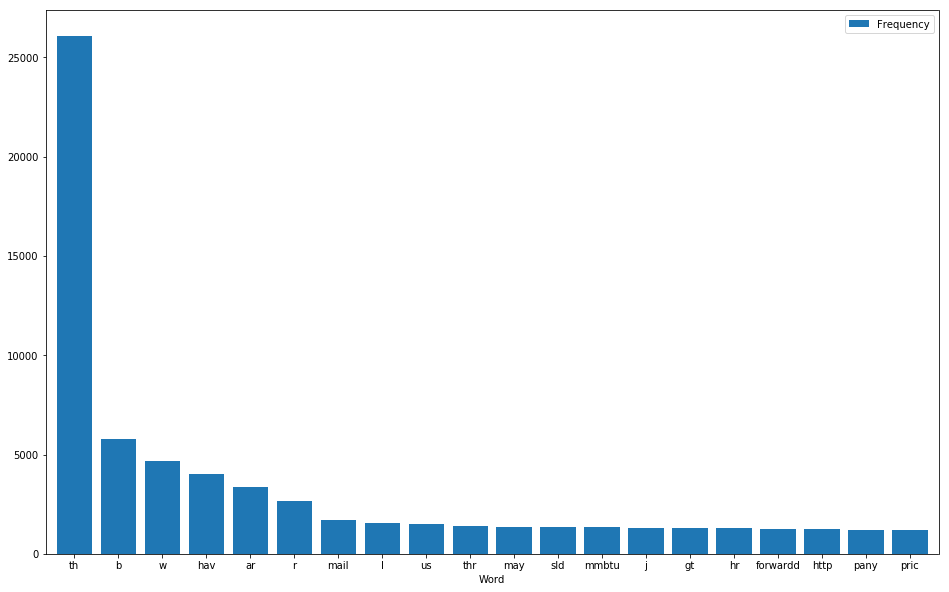

In [46]:
## Lets see what the common words are now ##

top_N = 20


stopwords = nltk.corpus.stopwords.words('english')
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (df_master['emails']
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)


# plot
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)

## Before we create the models we need to balance the dataset, currently ham has far more entries.

##### We want to randomly select 1463 (entries in spam dataframe) from the ham dataframe

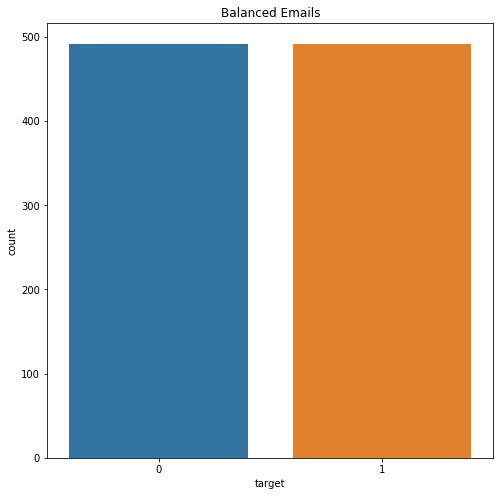

In [66]:
# Shuffle the Dataset.
shuffled_df = df_master.sample(frac=1,random_state=4)

#Randomly select 1463 observations from the ham (majority class)
ham_df = shuffled_df.loc[shuffled_df['target'] == 0].sample(n=492,random_state=42)

# Put all the spam class in a separate dataset.
spam_df = shuffled_df.loc[shuffled_df['target'] == 1].sample(n=492,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([ham_df, spam_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('target', data=normalized_df)
plt.title('Balanced Emails')
plt.show()

In [65]:
normalized_df.head()

,emails,target,email_len
2676,nom for march \n s attachd fil no xls \n ...,0,53
1188,mthanol plant status\nit now appars th mthanol...,0,84
1908,nom for octobr \n s attachd fil nl xls \n...,0,55
2052,duk nrgy fild \n add th dmand charg for xcss...,0,99
262,hl p flow month to dat\nattachd ar th month t...,0,61


## Create Models

### Implement TF-IDF on the emails column of the Dataframe

In [56]:
# Convert a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = normalized_df['emails']

vectorizer = TfidfVectorizer().fit_transform(corpus)


### Perform an 70:30 train, test split on the data

In [57]:
#Split the data into 70% training (X_train & y_train) and 30% testing (X_test & y_test) data sets#Split  
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vectorizer, normalized_df['target'], test_size = 0.30, random_state = 0)

# Multinomial Naive Bayes Classifier

##### suitable for classification with discrete features (e.g., word counts for text classification)

In [92]:

#Create and train the Naive Bayes classifier
#The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification)
from sklearn.externals import joblib
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)


##Save model ##
joblib.dump(clf, 'C:/Users/obria/Desktop/Year2/ML/Assignment1/MutlinomialNB_Model.pkl', compress=True)

['C:/Users/obria/Desktop/Year2/ML/Assignment1/MutlinomialNB_Model.pkl']

### Evaluate model on training data.

##### We can see the overall accuracy is 98%, which is very good! 
##### The percision is, Out of all the positive classes we have predicted correctly, how many are actually positive(99%)
##### The Recall is, Out of all the positive classes, how much we predicted correctly. This should be high as possible which it is (99%)
##### It is difficult to compare two models with low precision and high recall or vice versa. So to make them comparable, we use F-Score. F-score helps to measure Recall and Precision at the same time.

In [64]:
#Evaluate the model on the training data set
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print('Accuracy: ', accuracy_score(y_train,pred))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99       345
          1       0.98      1.00      0.99       343

avg / total       0.99      0.99      0.99       688

Confusion Matrix: 
 [[339   6]
 [  1 342]]
Accuracy:  0.9898255813953488


In [69]:
cr = classification_report(y_true=y_test, y_pred=y_pred)
print(cr)

             precision    recall  f1-score   support

          0       0.99      0.90      0.94       147
          1       0.91      0.99      0.95       149

avg / total       0.95      0.94      0.94       296



###### The predicted probability for the test set can be obtained in sklearn with

In [74]:
y_pred_prob = classifier.predict_proba(X_test)[:,1]

## Plot Multinomial Naive Bayes model

#### With the precision-recall curve, the closer it is to the top-right corner, the better the algorithm. And hence a larger area under the curve (AUC) indicates that the algorithm has higher recall and higher precision

#### We can see that the area under the curve is very big in the below plot indicating that the Multinomial Naive Bayes model is a good one.

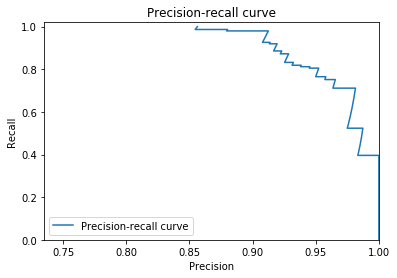

In [75]:
from sklearn.metrics import precision_recall_curve 

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.xlim([0.735, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower left")

# save figure
plt.savefig('precision_recall.png', dpi=200)

## Support Vector Machine

#### From what I read online the best models to use for NLP are Naiva Bayes and SVM.

##### Below I have implemented the SVM which has 94% accuracy with the percision and recall also coming out very high. 


In [86]:
from sklearn.externals import joblib

#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear',probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)



In [90]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics


# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

##Save model ##
joblib.dump(clf, 'C:/Users/obria/Desktop/Year2/ML/Assignment1/SVM_Model.pkl', compress=True)

Accuracy: 0.9425675675675675


['C:/Users/obria/Desktop/Year2/ML/Assignment1/SVM_Model.pkl']

In [80]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9074074074074074
Recall: 0.9865771812080537


# Plot SVM model

#### Similar to the ROC Curve for the Multinomial Naive Bayes Model we can see that the area under the curve is  also very big in the below plot indicating that the SVM model is also very good. 

##### It looks like the SVM model has a higher recall and higher percision to the Multinomial Naive Bayes.

In [84]:
y_pred_prob1 = clf.predict_proba(X_test)[:,1]

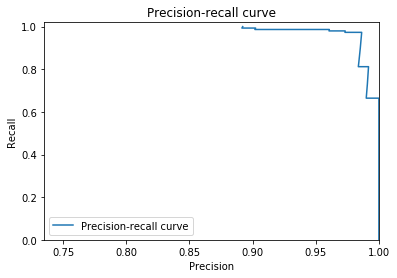

In [85]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob1)

# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.xlim([0.735, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower left")

# save figure
plt.savefig('precision_recall.png', dpi=200)

# To Conclude

### After conducting exploritory Data Analysis, Featuring Engineering, balancing the datasets and then generating models I conclude that the Multinomial Naive Bayes Model is the model that should be used during the classification of Ham or Spam emails.
#### With an accuracy rating of over 98% it's hard to argue against using this model.
